### Myntra Customer Review Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
import nltk


In [2]:
# Download NLTK data
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sandh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [16]:
# Load the rating dataset
df = pd.read_csv('FashionDataset.csv')

In [17]:
# Inspect the datasets
print(df.head())

   Unnamed: 0        p_id                                               name   
0           0  17048614.0  Khushal K Women Black Ethnic Motifs Printed Ku...  \
1           1  16524740.0  InWeave Women Orange Solid Kurta with Palazzos...   
2           2  16331376.0  Anubhutee Women Navy Blue Ethnic Motifs Embroi...   
3           3  14709966.0  Nayo Women Red Floral Printed Kurta With Trous...   
4           4  11056154.0   AHIKA Women Black & Green Printed Straight Kurta   

    price     colour      brand   
0  5099.0      Black  Khushal K  \
1  5899.0     Orange    InWeave   
2  4899.0  Navy Blue  Anubhutee   
3  3699.0        Red       Nayo   
4  1350.0      Black      AHIKA   

                                                 img  ratingCount  avg_rating   
0  http://assets.myntassets.com/assets/images/170...       4522.0    4.418399  \
1  http://assets.myntassets.com/assets/images/165...       1081.0    4.119334   
2  http://assets.myntassets.com/assets/images/163...       1752.0

In [18]:
# Display the column names
print(df.columns)

Index(['Unnamed: 0', 'p_id', 'name', 'price', 'colour', 'brand', 'img',
       'ratingCount', 'avg_rating', 'description', 'p_attributes'],
      dtype='object')


In [19]:
# Assuming that we need to use 'description' as review text and 'avg_rating' as sentiment indicator

# Data Preprocessing
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text


In [20]:
# Cleaning the description text
df['description'] = df['description'].astype(str).apply(clean_text)


In [21]:
# Mapping average ratings to binary sentiment (0 for negative, 1 for positive)
df['Sentiment'] = df['avg_rating'].apply(lambda x: 1 if x > 3 else 0)

In [22]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['description'], df['Sentiment'], test_size=0.25, random_state=42)

In [23]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [24]:
# Sentiment Classification using Logistic Regression
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

In [25]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76      2017
           1       0.70      0.62      0.66      1566

    accuracy                           0.72      3583
   macro avg       0.71      0.71      0.71      3583
weighted avg       0.71      0.72      0.71      3583



In [26]:
# Perform clustering on the reviews
def cluster_reviews(reviews, n_clusters=2):
    tfidf_matrix = vectorizer.fit_transform(reviews)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(tfidf_matrix)
    return kmeans, tfidf_matrix

In [27]:
# Cluster positive and negative reviews separately
positive_reviews = df[df['Sentiment'] == 1]['description']
negative_reviews = df[df['Sentiment'] == 0]['description']

kmeans_positive, tfidf_positive = cluster_reviews(positive_reviews, n_clusters=5)
kmeans_negative, tfidf_negative = cluster_reviews(negative_reviews, n_clusters=5)

C:\Users\sandh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [29]:
# Visualize clusters using PCA
def plot_clusters(kmeans, tfidf_matrix, title):
    pca = PCA(n_components=2)
    scatter_plot_points = pca.fit_transform(tfidf_matrix.toarray())
    colors = ["r", "b", "c", "y", "m"]
    x_axis = [o[0] for o in scatter_plot_points]
    y_axis = [o[1] for o in scatter_plot_points]
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(x_axis, y_axis, c=[colors[d] for d in kmeans.labels_])
    plt.title(title)
    plt.show()


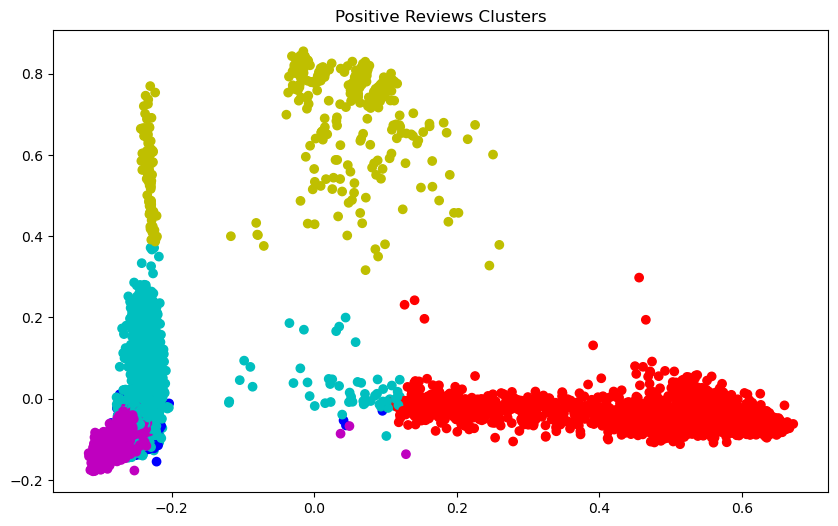

In [30]:
# Plot for positive reviews
plot_clusters(kmeans_positive, tfidf_positive, "Positive Reviews Clusters")

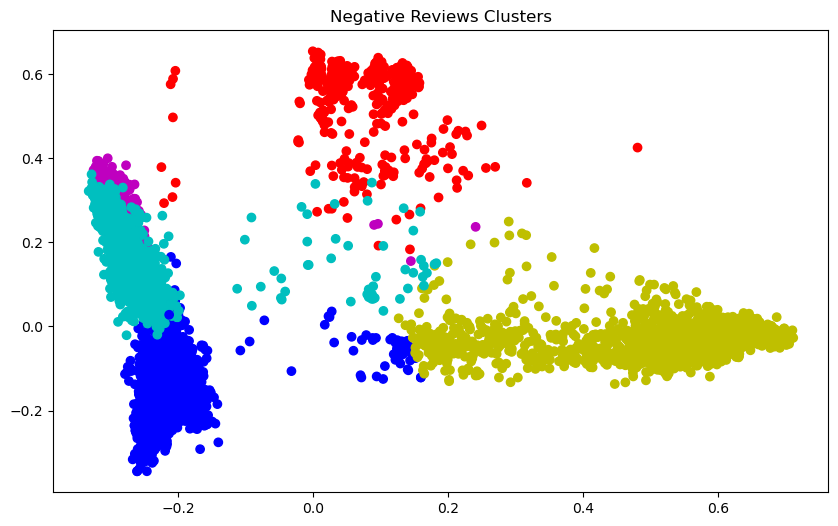

In [31]:
# Plot for negative reviews
plot_clusters(kmeans_negative, tfidf_negative, "Negative Reviews Clusters")